# SALES PREDICTION USING PYTHON¶
Sales prediction with Python enables businesses to forecast future sales based on factors like advertising expenses, customer segmentation, and marketing platforms. Leveraging machine learning techniques, companies can analyze historical data, build predictive models, and make data-driven decisions to optimize marketing strategies, allocate resources efficiently, and maximize revenue potential. By continuously updating the models with new data, businesses can adapt to market dynamics and achieve better performance in a competitive environment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
News=pd.read_csv("Downloads/Advertising.csv")
News

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
News.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Agregate Function

In [9]:
News.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

In [11]:
News.median()

Unnamed: 0    100.50
TV            149.75
Radio          22.90
Newspaper      25.75
Sales          12.90
dtype: float64

In [13]:
News.std()

Unnamed: 0    57.879185
TV            85.854236
Radio         14.846809
Newspaper     21.778621
Sales          5.217457
dtype: float64

## Null values check  & Duplicates Remove

In [16]:
News.isnull().values.any()

False

In [19]:
News.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [21]:
News.drop_duplicates()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## IQR

In [24]:
Q1=News.quantile(0.25)
Q3=News.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Unnamed: 0     99.500
TV            144.450
Radio          26.550
Newspaper      32.350
Sales           7.025
dtype: float64


## Z-score

In [27]:
 from scipy import stats

In [31]:
z=np.abs(stats.zscore(News))
print(z)

     Unnamed: 0        TV     Radio  Newspaper     Sales
0      1.723412  0.969852  0.981522   1.778945  1.552053
1      1.706091  1.197376  1.082808   0.669579  0.696046
2      1.688771  1.516155  1.528463   1.783549  0.907406
3      1.671450  0.052050  1.217855   1.286405  0.860330
4      1.654129  0.394182  0.841614   1.281802  0.215683
..          ...       ...       ...        ...       ...
195    1.654129  1.270941  1.321031   0.771217  1.234053
196    1.671450  0.617035  1.240003   1.033598  0.830548
197    1.688771  0.349810  0.942899   1.111852  0.234898
198    1.706091  1.594565  1.265121   1.640850  2.205347
199    1.723412  0.993206  0.990165   1.005979  0.119610

[200 rows x 5 columns]


## Data visualization

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

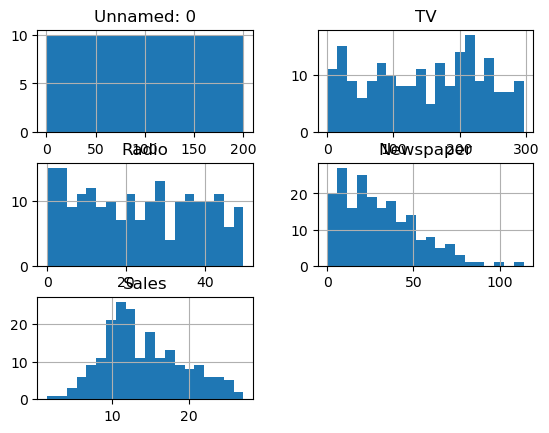

In [39]:
News.hist(bins=20)

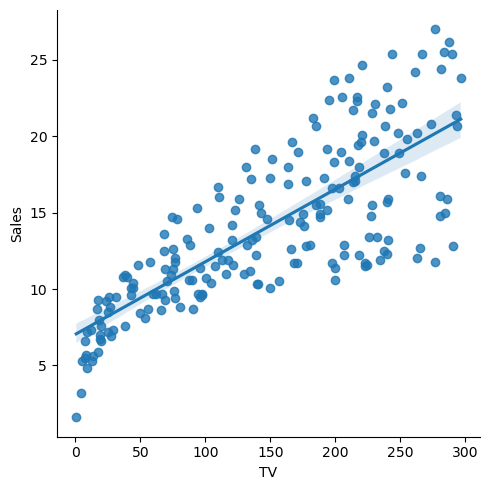

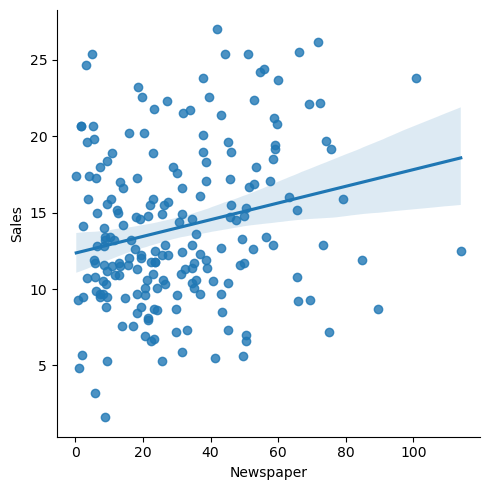

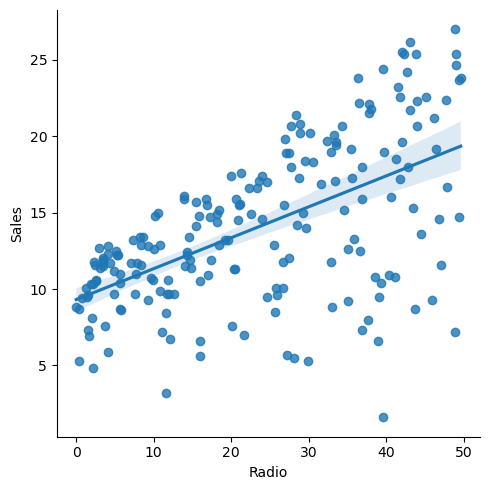

In [43]:
sns.lmplot(x='TV',y='Sales',data=News)
sns.lmplot(x='Newspaper',y='Sales',data=News)
sns.lmplot(x='Radio',y='Sales',data=News)

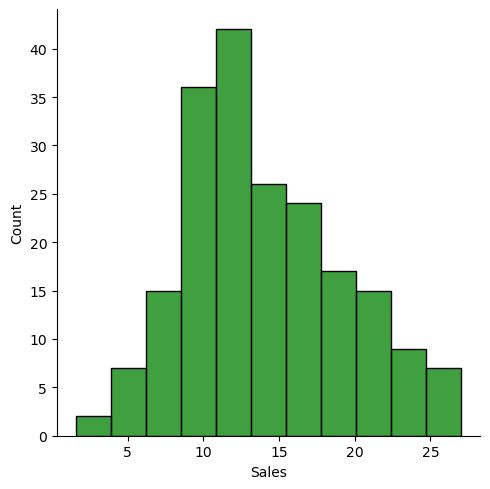

In [55]:
sns.displot(News["Sales"],color="GReen")

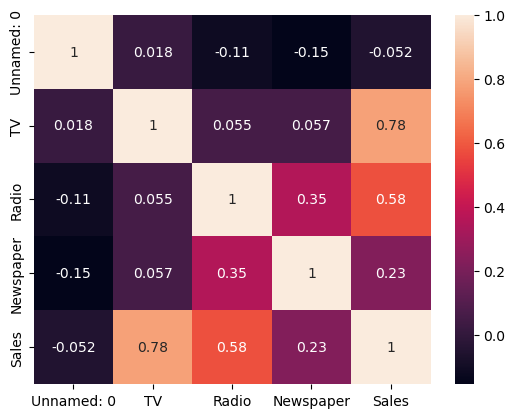

In [61]:
sns.heatmap(News.corr(),annot=True)
plt.show()

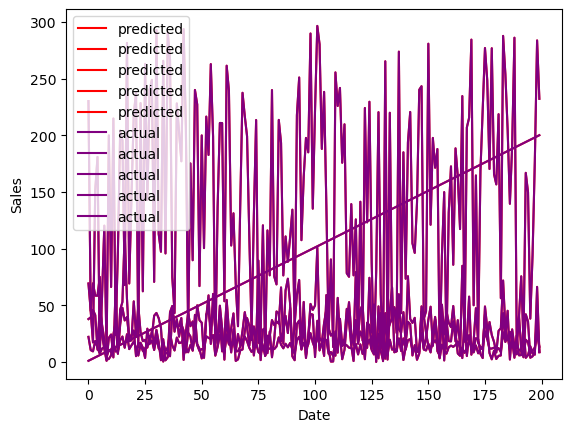

In [7]:
plt.plot(News,color='red',label='predicted')
plt.plot(News,color='purple',label="actual")
plt.xlabel("Date")
plt.ylabel("Sales")
leg = plt.legend()
plt.show()

## Conclusion
Improved Forecasting Will Lead to Better Business Decisions: More accurate sales forecasting will enable retailers to make better business decisions, such as optimizing inventory levels, improving supply chain management, and developing more effective marketing strategies